# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/content/corpus (2).pkl')
data

,transcript,full_name
EDGAR,\n \nIn Edgar Allan Poe’s The Fall of the Hous...,EDGAR
FRANK,\n \nIn the vast realm of science fiction lite...,VYVYAN HOLLAND
HENRY,\n \nHenry David Thoreau was born in 1817 and ...,RICHARD GRENIER
MARY,\n \nNewport RFD 2\nRhode Island\n4/26/51\nDea...,FRANK HERBERT
RICHARD,\n \nRichard Grenier discusses Alice Walker’s ...,MARY MCCARTHY
VYVYAN,"\n \nVyvyan Holland, in his introduction to th...",HENRY DAVID
ZORA,\n \nBorn in 1891 in rural Alabama and raised ...,ZORA HURSTON


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
EDGAR,\n \nIn Edgar Allan Poe’s The Fall of the Hous...,EDGAR,0.037532,0.517762
FRANK,\n \nIn the vast realm of science fiction lite...,VYVYAN HOLLAND,0.208095,0.527887
HENRY,\n \nHenry David Thoreau was born in 1817 and ...,RICHARD GRENIER,0.134634,0.534658
MARY,\n \nNewport RFD 2\nRhode Island\n4/26/51\nDea...,FRANK HERBERT,0.068346,0.462346
RICHARD,\n \nRichard Grenier discusses Alice Walker’s ...,MARY MCCARTHY,0.086123,0.428145
VYVYAN,"\n \nVyvyan Holland, in his introduction to th...",HENRY DAVID,0.175570,0.455909
ZORA,\n \nBorn in 1891 in rural Alabama and raised ...,ZORA HURSTON,0.045323,0.464096


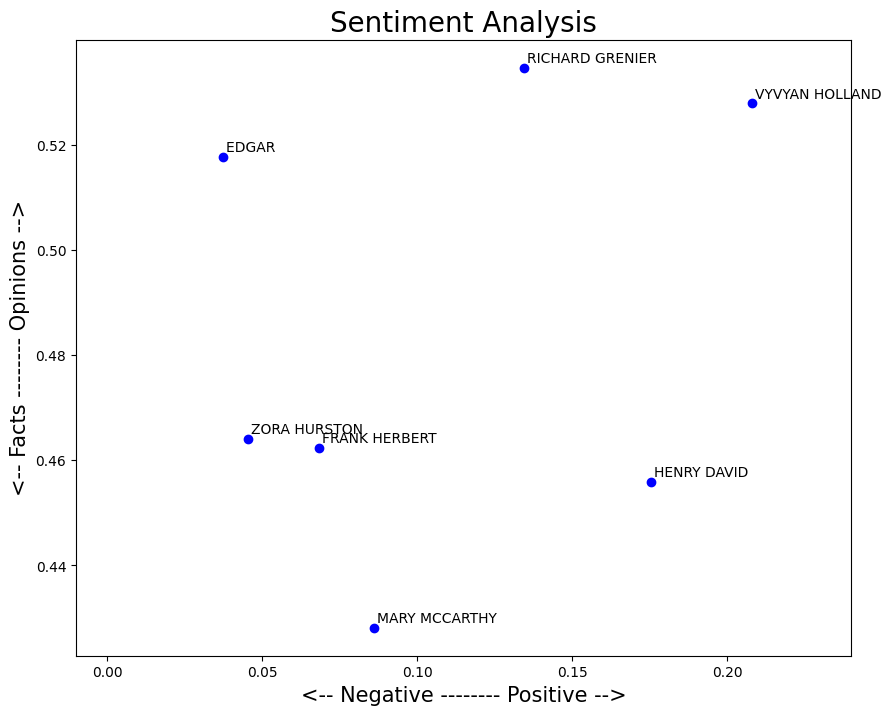

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .24)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
EDGAR,\n \nIn Edgar Allan Poe’s The Fall of the Hous...,EDGAR,0.037532,0.517762
FRANK,\n \nIn the vast realm of science fiction lite...,VYVYAN HOLLAND,0.208095,0.527887
HENRY,\n \nHenry David Thoreau was born in 1817 and ...,RICHARD GRENIER,0.134634,0.534658
MARY,\n \nNewport RFD 2\nRhode Island\n4/26/51\nDea...,FRANK HERBERT,0.068346,0.462346
RICHARD,\n \nRichard Grenier discusses Alice Walker’s ...,MARY MCCARTHY,0.086123,0.428145
VYVYAN,"\n \nVyvyan Holland, in his introduction to th...",HENRY DAVID,0.175570,0.455909
ZORA,\n \nBorn in 1891 in rural Alabama and raised ...,ZORA HURSTON,0.045323,0.464096


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['\n \nIn Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he encounters his childhood friend Roderick Usher, who suffers from acute anxiety and a morbid sensitivity to sensory stimuli. Roderick’s twin sister, Madeline, is gravely ill with a mysterious condition that leaves her cataleptic. The narrative unfolds in a gloomy atmosphere, filled with foreboding and supernatural elements, as the narrator witnesses the psychological disintegration of Roderick and the bizarre events leading up to Madeline’s death and terrifying return from the grave. The story culminates in the literal and metaphorical collapse of the Usher house into the dark tarn that mirrors it, symbolizing the end of the Usher family line and the inescapable doom of their ancient curse. Poe masterfully weaves themes of fear, isolation, and madness, creating a quintessential Gothic tale that explores the depths of human despair and the

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

7

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.03600589225589227,
  0.09636752136752137,
  0.06958822176213485,
  0.010610500610500607,
  0.11469782410571883,
  0.03106646825396825,
  -0.0015245602745602746,
  -0.0656053459119497,
  0.09297304106827918,
  0.03582010582010582],
 [0.04722222222222222,
  0.11428571428571428,
  0.26666666666666666,
  0.16,
  0.1761904761904762,
  0.4666666666666666,
  0.11666666666666668,
  0.05555555555555555,
  0.37,
  0.18888888888888888],
 [0.16758658008658006,
  0.1781926406926407,
  0.12016694725028056,
  0.04245230078563411,
  0.150513468013468,
  0.08368844696969698,
  0.19675514914772727,
  0.12001262626262628,
  0.1163131313131313,
  0.12630385487528345],
 [0.17416666666666666,
  0.1933333333333333,
  -0.042602040816326535,
  0.05408163265306122,
  0.23849206349206348,
  -0.14236111111111113,
  -0.12921296296296295,
  0.1488888888888889,
  0.24791666666666667,
  0.0],
 [0.15021645021645022,
  0.017050691244239635,
  0.23672595520421602,
  0.043984126984126994,
  0.05512820512820512,
  0.

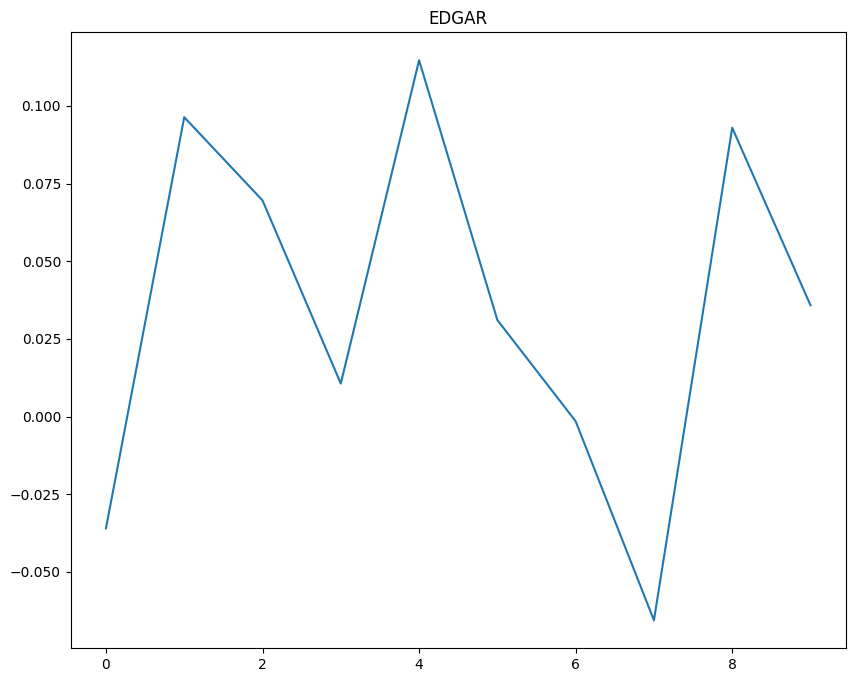

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

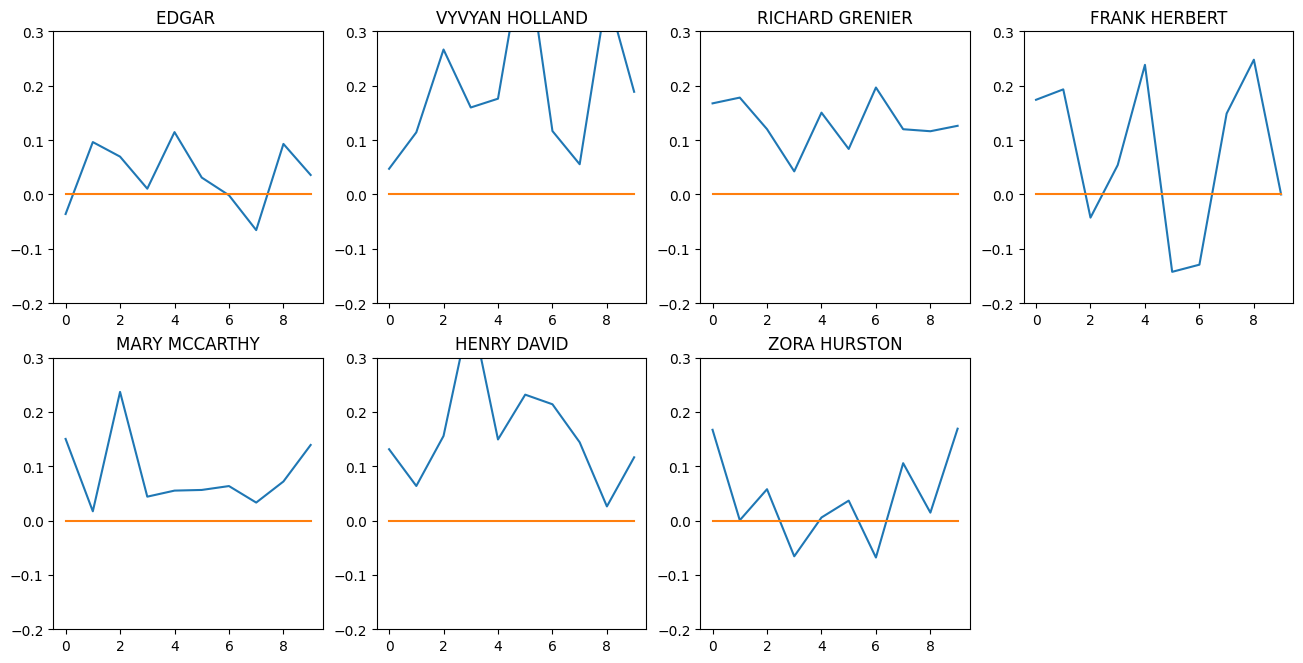

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.4947270322270323,
  0.49709401709401696,
  0.5060616517138257,
  0.5175396825396825,
  0.5438249031670082,
  0.47241567460317463,
  0.5532217932217929,
  0.5844339622641509,
  0.5098211136306373,
  0.493098544973545],
 [0.6166666666666667,
  0.37142857142857144,
  0.5333333333333333,
  0.6,
  0.7047619047619048,
  0.7000000000000001,
  0.375,
  0.08888888888888889,
  0.55,
  0.2888888888888889],
 [0.46973443223443223,
  0.48333333333333334,
  0.4301907968574634,
  0.5364197530864196,
  0.5875963337074448,
  0.41386972402597405,
  0.6608935335497835,
  0.5393728956228957,
  0.6353030303030303,
  0.5925736961451248],
 [0.5900000000000001,
  0.48666666666666664,
  0.5665816326530612,
  0.39285714285714285,
  0.42976190476190473,
  0.45625,
  0.49324074074074076,
  0.2577777777777778,
  0.54375,
  0.25],
 [0.2816017316017316,
  0.3825652841781875,
  0.38534255599472994,
  0.41484126984126984,
  0.33717948717948715,
  0.5028985507246376,
  0.3738095238095238,
  0.4172222222222222,
  0.4

(0.0, 1.0)

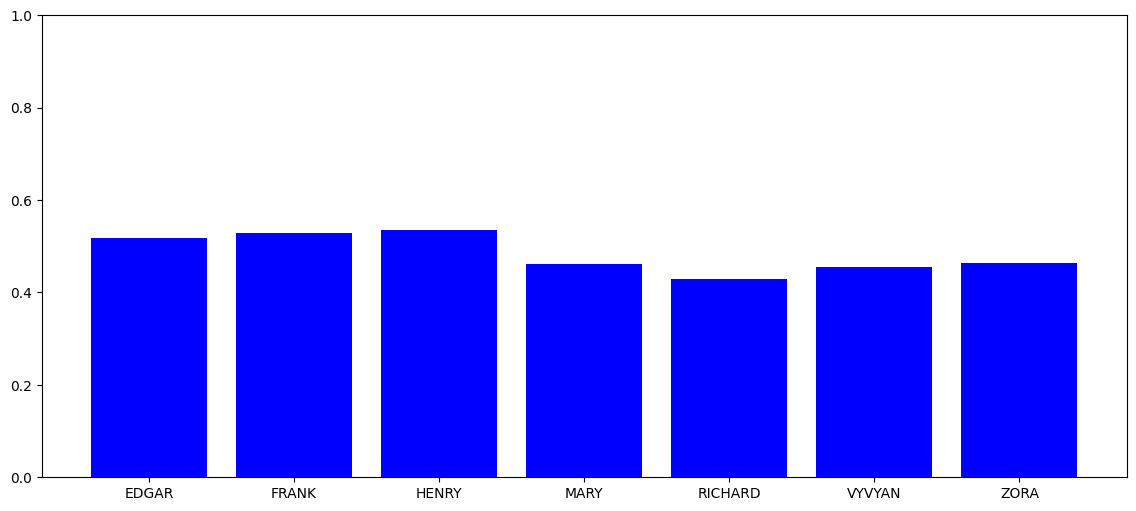

In [ ]:
data["subjectivity"]>0.5
plt.figure(figsize=(14,6))
plt.bar(data.index,data["subjectivity"] , color = 'blue')
plt.ylim(0,1)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)

plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
data['polarity_class'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
data['subjectivity_class'] = data['subjectivity'].apply(lambda x: 'objective' if x > 0.5 else 'subjective')

data

,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class
EDGAR,\n \nIn Edgar Allan Poe’s The Fall of the Hous...,EDGAR,0.037532,0.517762,positive,objective
FRANK,\n \nIn the vast realm of science fiction lite...,VYVYAN HOLLAND,0.208095,0.527887,positive,objective
HENRY,\n \nHenry David Thoreau was born in 1817 and ...,RICHARD GRENIER,0.134634,0.534658,positive,objective
MARY,\n \nNewport RFD 2\nRhode Island\n4/26/51\nDea...,FRANK HERBERT,0.068346,0.462346,positive,subjective
RICHARD,\n \nRichard Grenier discusses Alice Walker’s ...,MARY MCCARTHY,0.086123,0.428145,positive,subjective
VYVYAN,"\n \nVyvyan Holland, in his introduction to th...",HENRY DAVID,0.175570,0.455909,positive,subjective
ZORA,\n \nBorn in 1891 in rural Alabama and raised ...,ZORA HURSTON,0.045323,0.464096,positive,subjective


##1

Postive Polarity:-Vyvyan Holland,Richard Grenier,Henry,Mary are authors with positive polarity.


Negative Polarity:-Edgar,Zora,Frank

Less subjective:- Richard


More Subjective:- Edgar ,frank,Henry

##2


In [ ]:
import numpy as np
import math

def split_text5(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list5 = []
    for piece in range(n):
        split_list5.append(text[start[piece]:start[piece]+size])
    return split_list5

In [ ]:
list_pieces5 = []
for t in data.transcript:
    split5 = split_text5(t)
    list_pieces5.append(split5)

list_pieces5

[['\n \nIn Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he encounters his childhood friend Roderick Usher, who suffers from acute anxiety and a morbid sensitivity to sensory stimuli. Roderick’s twin sister, Madeline, is gravely ill with a mysterious condition that leaves her cataleptic. The narrative unfolds in a gloomy atmosphere, filled with foreboding and supernatural elements, as the narrator witnesses the psychological disintegration of Roderick and the bizarre events leading up to Madeline’s death and terrifying return from the grave. The story culminates in the literal and metaphorical collapse of the Usher house into the dark tarn that mirrors it, symbolizing the end of the Usher family line and the inescapable doom of their ancient curse. Poe masterfully weaves themes of fear, isolation, and madness, creating a quintessential Gothic tale that explores the depths of human despair and the

In [ ]:
polarity_transcript = []
for lp in list_pieces5:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.11150793650793651,
  0.124546485260771,
  0.06170138888888891,
  0.06429349517584815,
  0.006580687830687822,
  0.03207384403036576,
  0.05450735930735931,
  0.1535880398671096,
  0.02834101382488479,
  -0.07875272331154684,
  0.06049603174603178,
  -0.07405913978494627,
  0.100702947845805,
  0.08848238482384824,
  0.011135531135531137],
 [-0.023333333333333338,
  0.35,
  -0.07142857142857142,
  0.35,
  0.13333333333333333,
  0.16,
  -0.07142857142857142,
  0.6,
  0.2,
  0.11666666666666668,
  0.4,
  0.05555555555555555,
  0.4,
  0.0,
  0.18888888888888888],
 [0.24261363636363634,
  0.1441919191919192,
  0.1579944178628389,
  0.12170745920745919,
  0.03013468013468014,
  0.08939393939393937,
  0.18954099821746884,
  0.02250566893424036,
  0.14509894867037723,
  0.2172203979732389,
  0.17644300144300143,
  0.09068181818181817,
  0.10833333333333334,
  0.2644901394901395,
  0.04777777777777778],
 [0.09583333333333333,
  0.202,
  0.24166666666666664,
  -0.05964285714285715,
  0.0223

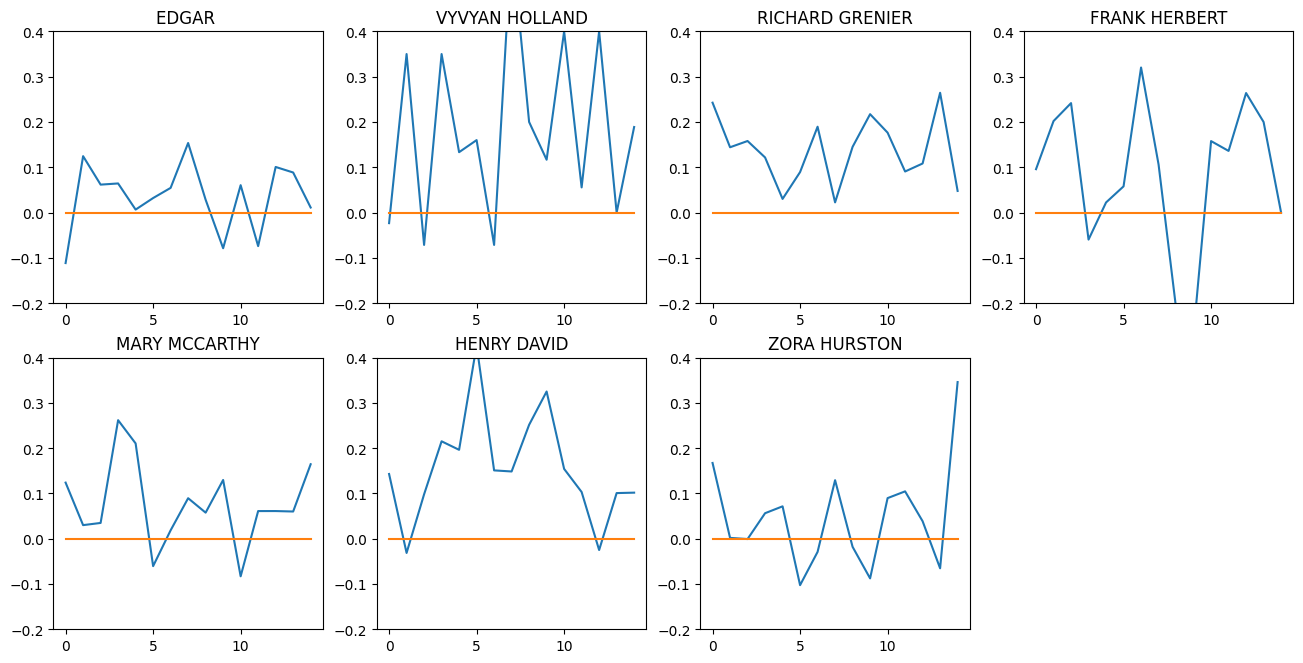

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.4)

plt.show()

More polarity:-Henry,Vyvyan
Less polairty:-Edgar,Zora,Mary

In [ ]:
import pprint

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Calculate polarity and subjectivity for each comedian's routine
polarity_transcript_new = []
subjectivity_transcript_new = []

for pieces in list_pieces5:
    polarities = [pol(piece) for piece in pieces]
    subjectivities = [sub(piece) for piece in pieces]
    polarity_transcript_new.append(polarities)
    subjectivity_transcript_new.append(subjectivities)

# Calculate average polarity and subjectivity for each comedian
avg_polarity = [np.mean(polarities) for polarities in polarity_transcript_new]
avg_subjectivity = [np.mean(subjectivities) for subjectivities in subjectivity_transcript_new]

# Classify comedians based on average polarity
new_polarity_class = ['positive' if polarity > 0 else ('negative' if polarity < 0 else 'neutral') for polarity in avg_polarity]

# Classify comedians based on average subjectivity
new_subjectivity_class = ['objective' if subjectivity > 0.5 else 'subjective' for subjectivity in avg_subjectivity]

# Update the DataFrame with polarity and subjectivity classifications
data['avg_polarity'] = avg_polarity
data['avg_subjectivity'] = avg_subjectivity

data['new_polarity_class'] = new_polarity_class
data['new_subjectivity_class'] = new_subjectivity_class

# Display the updated DataFrame
pprint.pprint(data)

                                                transcript        full_name  \
EDGAR    \n \nIn Edgar Allan Poe’s The Fall of the Hous...           EDGAR    
FRANK    \n \nIn the vast realm of science fiction lite...   VYVYAN HOLLAND   
HENRY    \n \nHenry David Thoreau was born in 1817 and ...  RICHARD GRENIER   
MARY     \n \nNewport RFD 2\nRhode Island\n4/26/51\nDea...    FRANK HERBERT   
RICHARD  \n \nRichard Grenier discusses Alice Walker’s ...    MARY MCCARTHY   
VYVYAN   \n \nVyvyan Holland, in his introduction to th...      HENRY DAVID   
ZORA     \n \nBorn in 1891 in rural Alabama and raised ...     ZORA HURSTON   

         polarity  subjectivity polarity_class subjectivity_class  \
EDGAR    0.037532      0.517762       positive          objective   
FRANK    0.208095      0.527887       positive          objective   
HENRY    0.134634      0.534658       positive          objective   
MARY     0.068346      0.462346       positive         subjective   
RICHARD  0.086123     

In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.4947270322270323,
  0.49709401709401696,
  0.5060616517138257,
  0.5175396825396825,
  0.5438249031670082,
  0.47241567460317463,
  0.5532217932217929,
  0.5844339622641509,
  0.5098211136306373,
  0.493098544973545],
 [0.6166666666666667,
  0.37142857142857144,
  0.5333333333333333,
  0.6,
  0.7047619047619048,
  0.7000000000000001,
  0.375,
  0.08888888888888889,
  0.55,
  0.2888888888888889],
 [0.46973443223443223,
  0.48333333333333334,
  0.4301907968574634,
  0.5364197530864196,
  0.5875963337074448,
  0.41386972402597405,
  0.6608935335497835,
  0.5393728956228957,
  0.6353030303030303,
  0.5925736961451248],
 [0.5900000000000001,
  0.48666666666666664,
  0.5665816326530612,
  0.39285714285714285,
  0.42976190476190473,
  0.45625,
  0.49324074074074076,
  0.2577777777777778,
  0.54375,
  0.25],
 [0.2816017316017316,
  0.3825652841781875,
  0.38534255599472994,
  0.41484126984126984,
  0.33717948717948715,
  0.5028985507246376,
  0.3738095238095238,
  0.4172222222222222,
  0.4

Subjective:-Richard,Frank ,Vvyan,Zora
Objective:-Henry,Edgar